In [1]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms #把資料轉成tenser方便計算

In [2]:
train_dataset = dsets.MNIST(root='./data',  #放在home下面data資料夾
                  train=True,
                  transform=transforms.ToTensor(),  #轉成tenser
                  download=True) #存在目錄下->重新load會比較快

test_dataset = dsets.MNIST(root='./data',  #放在home下面data資料夾
                  train=False, #不用train不用train
                  transform=transforms.ToTensor(),  #轉成tenser
                  ) #預設不download

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
import torch.utils.data as Data

In [4]:
num_epoch = 10
batch_size = 100
learning_rate = 0.005
num_test_image = 5

In [5]:
train_loader = Data.DataLoader(dataset = train_dataset,
                 batch_size = batch_size,
                 shuffle = True)  #shuffle data才不會讀到重覆的batch->訓練效果較好
test_loader = Data.DataLoader(dataset= test_dataset,
                 batch_size = batch_size,
                 shuffle=False)  #不做shuffle data

In [23]:
import torch.nn as nn

In [7]:
class AutoEncoder(nn.Module):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = nn.Sequential( #轉乘vector
        nn.Linear(28*28, 128),  #1st layer
        nn.Tanh(),
        nn.Linear(128, 64),   #2nd
        nn.Tanh(),
        nn.Linear(64, 12),   #3rd
        nn.Tanh(),
        nn.Linear(12, 3)
    )
    self.decoder = nn.Sequential( #vector轉回圖片
        nn.Linear(3, 12),
        nn.Tanh(),
        nn.Linear(12, 64),
        nn.Tanh(),
        nn.Linear(64, 128),
        nn.Tanh(),
        nn.Linear(128, 28*28)
    )
  def forward(self, x):
    encoded = self.encoder(x) #用途:歸納
    decoded = self.decoder(encoded) #用途:特徵->實體
    return encoded, decoded


# Train

In [22]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

In [9]:
autoencoder = AutoEncoder()
autoencoder

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): Tanh()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
  )
)

In [10]:
import torch.optim as opt

In [11]:
loss_fn = nn.MSELoss()
optimizer = opt.Adam(autoencoder.parameters(), lr=learning_rate)

In [12]:
view_data = Variable(test_dataset.data[:num_test_image].view(-1, 28*28).type(torch.FloatTensor)/255.)
#取出前五筆data,強制轉型

eopch: 0, loss: 0.1288


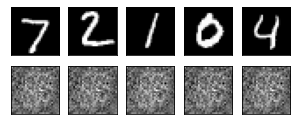

eopch: 0, loss: 0.0517


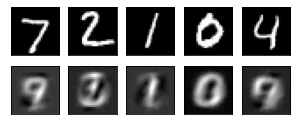

eopch: 0, loss: 0.0525


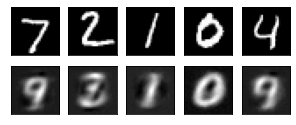

eopch: 0, loss: 0.0530


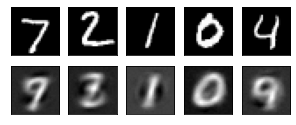

eopch: 0, loss: 0.0490


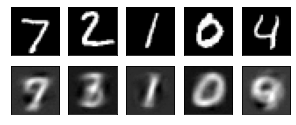

eopch: 0, loss: 0.0456


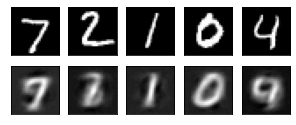

eopch: 1, loss: 0.0449


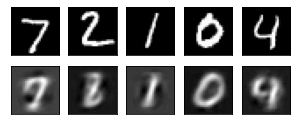

eopch: 1, loss: 0.0435


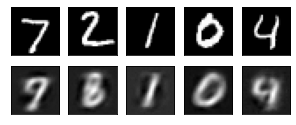

eopch: 1, loss: 0.0439


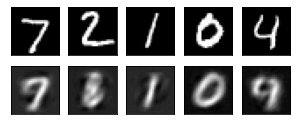

eopch: 1, loss: 0.0454


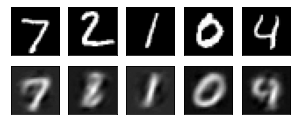

eopch: 1, loss: 0.0449


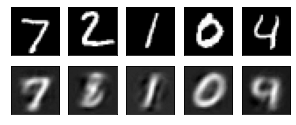

eopch: 1, loss: 0.0441


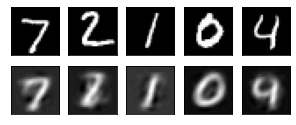

eopch: 2, loss: 0.0432


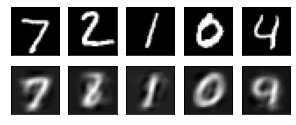

eopch: 2, loss: 0.0405


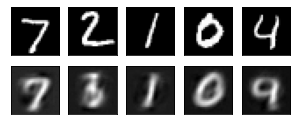

eopch: 2, loss: 0.0412


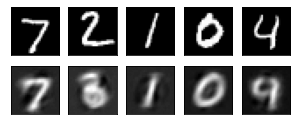

eopch: 2, loss: 0.0426


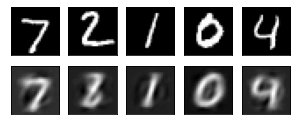

eopch: 2, loss: 0.0427


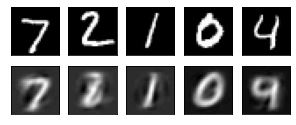

eopch: 2, loss: 0.0424


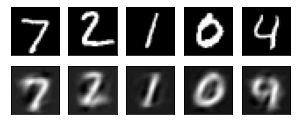

eopch: 3, loss: 0.0446


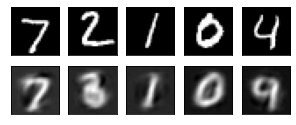

eopch: 3, loss: 0.0440


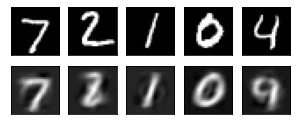

eopch: 3, loss: 0.0427


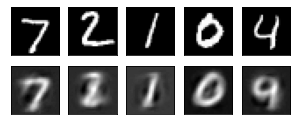

eopch: 3, loss: 0.0422


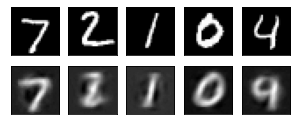

eopch: 3, loss: 0.0430


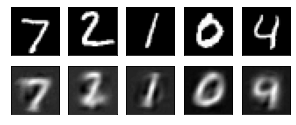

eopch: 3, loss: 0.0428


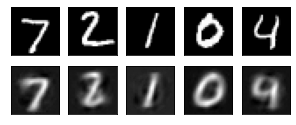

eopch: 4, loss: 0.0405


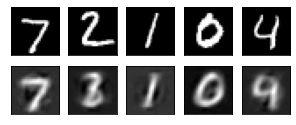

eopch: 4, loss: 0.0421


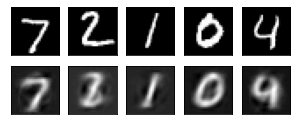

eopch: 4, loss: 0.0434


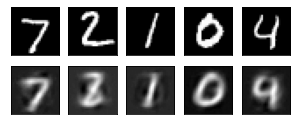

eopch: 4, loss: 0.0445


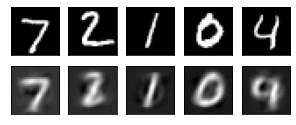

eopch: 4, loss: 0.0440


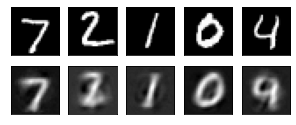

eopch: 4, loss: 0.0411


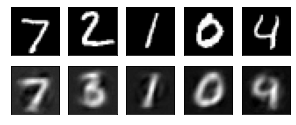

eopch: 5, loss: 0.0426


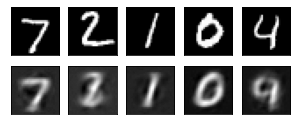

eopch: 5, loss: 0.0417


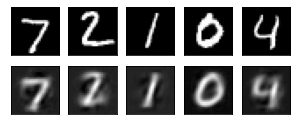

eopch: 5, loss: 0.0426


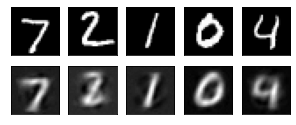

eopch: 5, loss: 0.0385


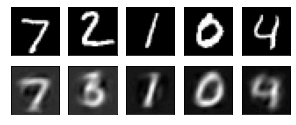

eopch: 5, loss: 0.0411


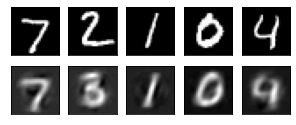

eopch: 5, loss: 0.0393


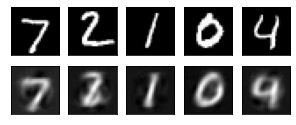

eopch: 6, loss: 0.0423


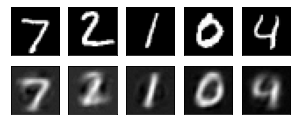

eopch: 6, loss: 0.0417


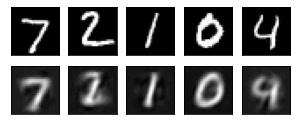

eopch: 6, loss: 0.0416


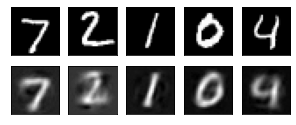

eopch: 6, loss: 0.0422


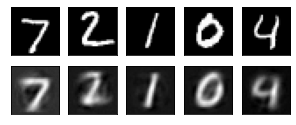

eopch: 6, loss: 0.0434


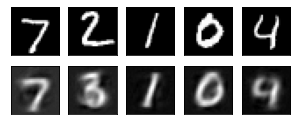

eopch: 6, loss: 0.0394


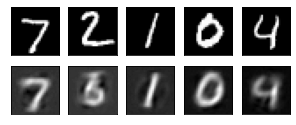

eopch: 7, loss: 0.0399


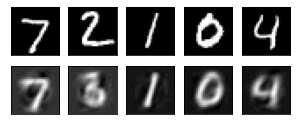

eopch: 7, loss: 0.0374


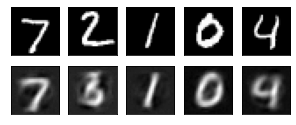

eopch: 7, loss: 0.0446


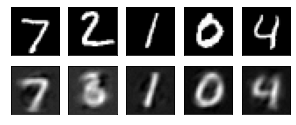

eopch: 7, loss: 0.0387


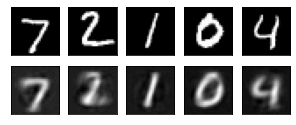

eopch: 7, loss: 0.0366


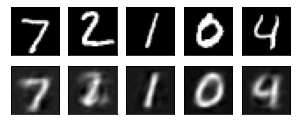

eopch: 7, loss: 0.0396


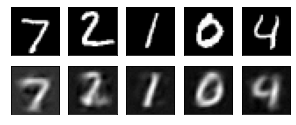

eopch: 8, loss: 0.0394


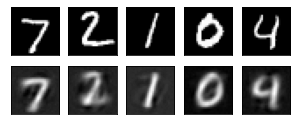

eopch: 8, loss: 0.0399


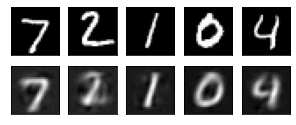

eopch: 8, loss: 0.0392


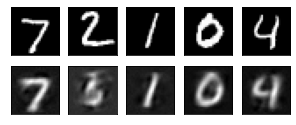

eopch: 8, loss: 0.0401


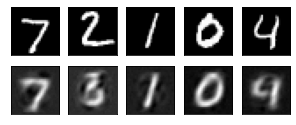

eopch: 8, loss: 0.0387


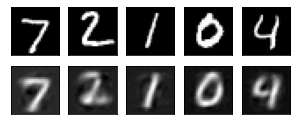

eopch: 8, loss: 0.0409


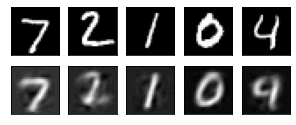

eopch: 9, loss: 0.0367


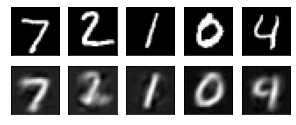

eopch: 9, loss: 0.0386


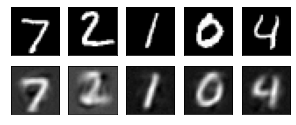

eopch: 9, loss: 0.0409


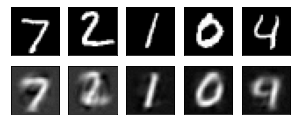

eopch: 9, loss: 0.0378


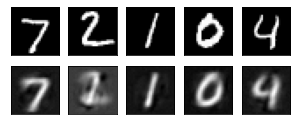

eopch: 9, loss: 0.0386


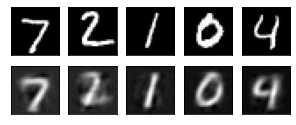

eopch: 9, loss: 0.0380


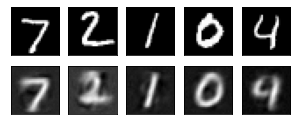

In [13]:
#training
for epoch in range(num_epoch):
  for i, (x,y) in enumerate(train_loader):
    b_x = Variable(x.view(-1, 28*28))
    b_y = Variable(x.view(-1, 28*28))
    b_labels = Variable(y)

    optimizer.zero_grad() #先歸0
    encoded, decoded = autoencoder(b_x)
    loss = loss_fn(decoded, b_y)
    loss.backward()
    optimizer.step()

    if i%100 == 0:
      print("eopch: %d, loss: %.4f"%(epoch, loss.data))
      _, decoded_data = autoencoder(view_data)
      f, a = plt.subplots(2, num_test_image, figsize = (5,2)) #s代表可以畫多個圖
      for j in range(num_test_image):
        a[0][j].imshow(np.reshape(view_data.data.numpy()[j],(28,28)), cmap="gray")
        a[0][j].set_xticks(())
        a[0][j].set_yticks(())
        a[1][j].imshow(np.reshape(decoded_data.data.numpy()[j],(28,28)), cmap="gray")
        a[1][j].set_xticks(())
        a[1][j].set_yticks(())
      plt.draw() 
      plt.show()


# convTranspose



In [18]:
m = nn.ConvTranspose2d(1,1,kernel_size=2,stride=2)
a = torch.FloatTensor([[[[1,2,3],[4,5,6],[7,8,9]]]])
print(a.shape)

torch.Size([1, 1, 3, 3])


In [20]:
b =m(a)
print(b.shape)
print(b)

torch.Size([1, 1, 6, 6])
tensor([[[[ 0.0561,  0.2855, -0.0795,  0.3792, -0.2151,  0.4730],
          [-0.1171,  0.2225, -0.4260,  0.2533, -0.7348,  0.2842],
          [-0.3507,  0.5667, -0.4863,  0.6605, -0.6219,  0.7543],
          [-1.0436,  0.3150, -1.3524,  0.3458, -1.6613,  0.3766],
          [-0.7575,  0.8480, -0.8931,  0.9418, -1.0287,  1.0355],
          [-1.9701,  0.4074, -2.2789,  0.4383, -2.5878,  0.4691]]]],
       grad_fn=<SlowConvTranspose2DBackward0>)


# CNN

In [51]:
#使用到GPU，更改執行狀態
class AutoEncoderCNN(nn.Module):
  def __init__(self):
    super(AutoEncoderCNN, self).__init__()
    self.encoder = nn.Sequential(
      nn.Conv2d(1,16,kernel_size=3,stride=1,padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,stride=2),
      nn.Conv2d(16,32,kernel_size=3,stride=1,padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,stride=2),
      nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=7,stride=1)           
    )
    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(64,32,kernel_size=7,stride=1), #first layer
        nn.ReLU(),
        nn.ConvTranspose2d(32,16,kernel_size=2,stride=2), #second layer
        nn.ReLU(),
        nn.ConvTranspose2d(16,1,kernel_size=2,stride=2), #third layer
        nn.Sigmoid() #結果為圖片,實驗出來Sigmoid最好       
    )
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded  

In [52]:
autoencoderCNN = AutoEncoderCNN()
autoencoderCNN.cuda()

AutoEncoderCNN(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=7, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU()
    (4): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
    (5): Sigmoid()
  )
)

In [53]:
loss_fn = nn.MSELoss()
optimizer = opt.Adam(autoencoderCNN.parameters(), lr=learning_rate)

In [54]:
view_data = Variable(test_dataset.data[:num_test_image].view(-1, 1, 28, 28).type(torch.cuda.FloatTensor)/255.)
#取出前五筆data

eopch: 0, loss: 0.1916


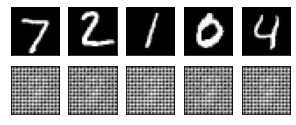

eopch: 0, loss: 0.0681


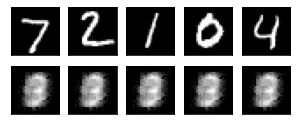

eopch: 0, loss: 0.0529


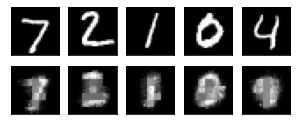

eopch: 0, loss: 0.0456


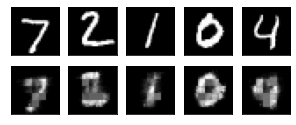

eopch: 0, loss: 0.0359


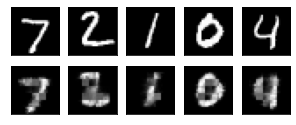

eopch: 0, loss: 0.0342


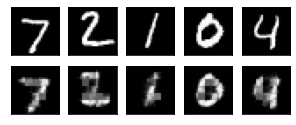

eopch: 1, loss: 0.0328


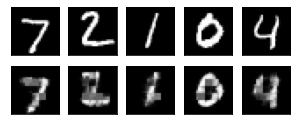

eopch: 1, loss: 0.0316


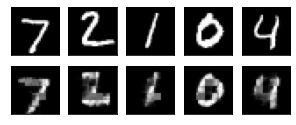

eopch: 1, loss: 0.0289


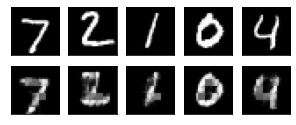

eopch: 1, loss: 0.0282


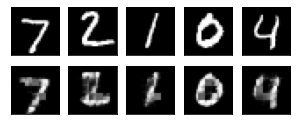

eopch: 1, loss: 0.0283


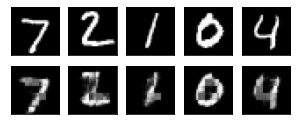

eopch: 1, loss: 0.0291


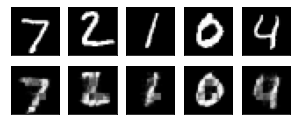

eopch: 2, loss: 0.0279


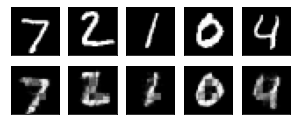

eopch: 2, loss: 0.0266


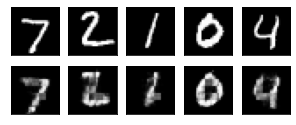

eopch: 2, loss: 0.0269


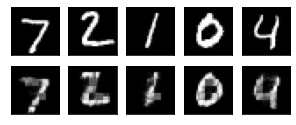

eopch: 2, loss: 0.0259


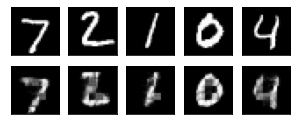

eopch: 2, loss: 0.0250


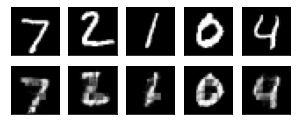

eopch: 2, loss: 0.0251


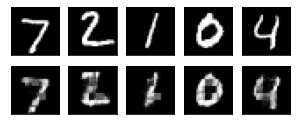

eopch: 3, loss: 0.0259


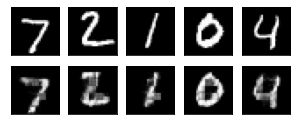

eopch: 3, loss: 0.0240


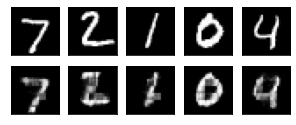

eopch: 3, loss: 0.0230


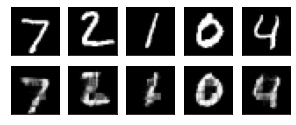

eopch: 3, loss: 0.0250


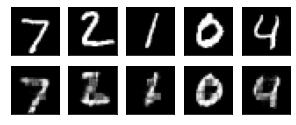

eopch: 3, loss: 0.0240


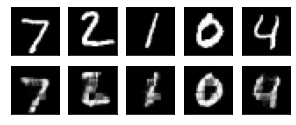

eopch: 3, loss: 0.0226


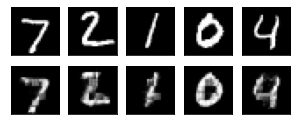

eopch: 4, loss: 0.0231


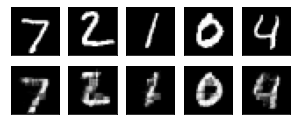

eopch: 4, loss: 0.0234


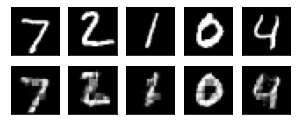

eopch: 4, loss: 0.0228


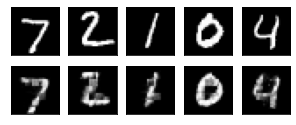

eopch: 4, loss: 0.0217


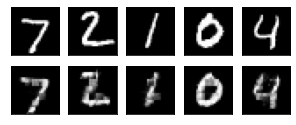

eopch: 4, loss: 0.0224


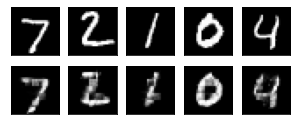

eopch: 4, loss: 0.0222


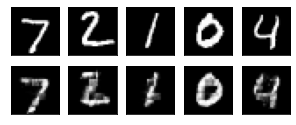

eopch: 5, loss: 0.0205


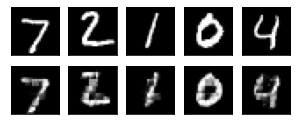

eopch: 5, loss: 0.0220


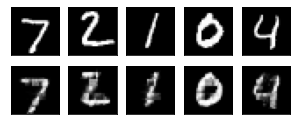

eopch: 5, loss: 0.0224


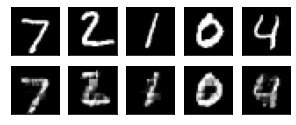

eopch: 5, loss: 0.0217


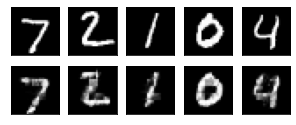

eopch: 5, loss: 0.0203


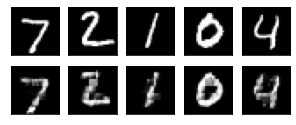

eopch: 5, loss: 0.0207


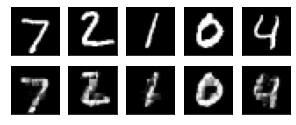

eopch: 6, loss: 0.0205


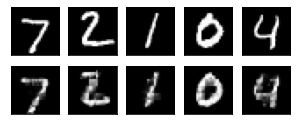

eopch: 6, loss: 0.0200


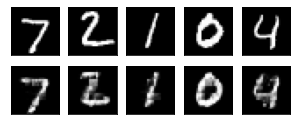

eopch: 6, loss: 0.0198


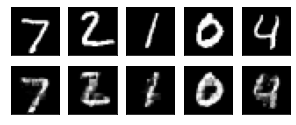

eopch: 6, loss: 0.0205


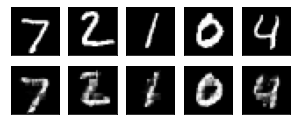

eopch: 6, loss: 0.0199


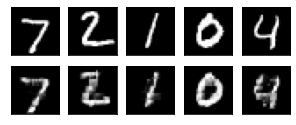

eopch: 6, loss: 0.0190


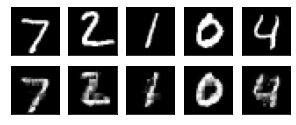

eopch: 7, loss: 0.0213


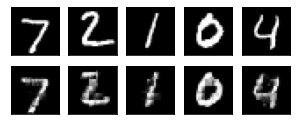

eopch: 7, loss: 0.0204


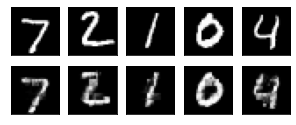

eopch: 7, loss: 0.0199


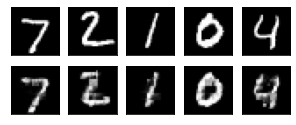

eopch: 7, loss: 0.0185


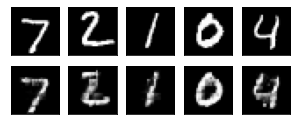

eopch: 7, loss: 0.0202


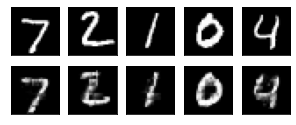

eopch: 7, loss: 0.0187


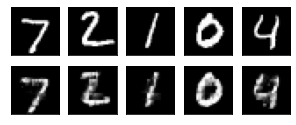

eopch: 8, loss: 0.0195


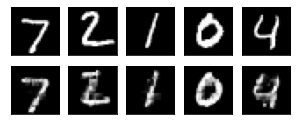

eopch: 8, loss: 0.0181


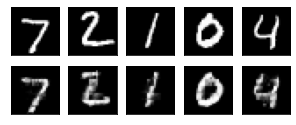

eopch: 8, loss: 0.0189


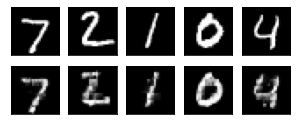

eopch: 8, loss: 0.0190


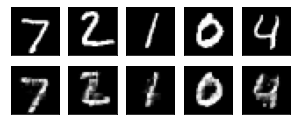

eopch: 8, loss: 0.0188


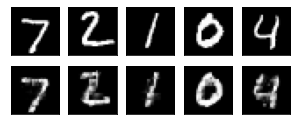

eopch: 8, loss: 0.0198


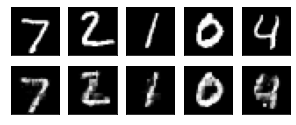

eopch: 9, loss: 0.0189


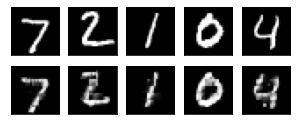

eopch: 9, loss: 0.0189


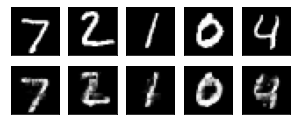

eopch: 9, loss: 0.0191


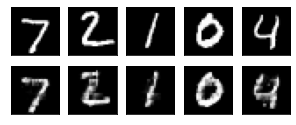

eopch: 9, loss: 0.0182


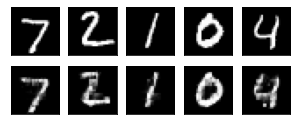

eopch: 9, loss: 0.0198


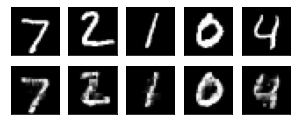

eopch: 9, loss: 0.0192


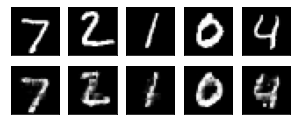

In [55]:
#training
for epoch in range(num_epoch):
  for i, (x,y) in enumerate(train_loader):
    b_x = Variable(x).cuda() #丟到CPU
    b_y = Variable(x).cuda()
    b_labels = Variable(y)

    optimizer.zero_grad() #先歸0
    encoded, decoded = autoencoderCNN(b_x)
    loss = loss_fn(decoded, b_y)
    loss.backward()
    optimizer.step()

    if i%100 == 0:
      print("eopch: %d, loss: %.4f"%(epoch, loss.data))
      _, decoded_data = autoencoderCNN(view_data)
      f, a = plt.subplots(2, num_test_image, figsize = (5,2)) #s代表可以畫多個圖
      for j in range(num_test_image):
        a[0][j].imshow(np.reshape(view_data.data.cpu().numpy()[j],(28,28)), cmap="gray")
        a[0][j].set_xticks(())
        a[0][j].set_yticks(())
        a[1][j].imshow(np.reshape(decoded_data.data.cpu().numpy()[j],(28,28)), cmap="gray")
        a[1][j].set_xticks(())
        a[1][j].set_yticks(())
      plt.draw() 
      plt.show()
